In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from imblearn.over_sampling import ADASYN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTENC
# import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import json
# from sklearn.model_selection # 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer




In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
TREE_DEPTH = 4
RANDOM_STATE = 42
TEST_SIZE = 0.1
N_NEIGHBORS = 20

In [4]:
from sklearn.model_selection import train_test_split


In [5]:
df = pd.read_csv('churn_dataset_train_cleaned.csv')
df.head()

,ID,region_category,membership_category,joining_date,joined_through_referral,used_special_discount,offer_application_preference,past_complaint,complaint_status,churn,...,medium_of_operation_dim1,medium_of_operation_dim2,internet_option_dim1,internet_option_dim2,internet_option_dim3,preferred_offer_types_dim1,preferred_offer_types_dim2,feedback_dim1,feedback_dim2,feedback_dim3
0,1644,0.0,0.0,09/08/2017,1,1,0,0,Not Applicable,1,...,1,0,1,1,1,1,0,1,0,0
1,8516,0.0,NaN,09/02/2016,0,1,0,0,Not Applicable,0,...,1,1,0,0,0,0,1,1,0,0
2,15564,1.0,NaN,11/06/2017,1,1,0,0,Not Applicable,1,...,1,0,0,0,0,0,1,1,0,0
3,22211,0.5,NaN,09/02/2016,0,1,0,0,Not Applicable,0,...,1,0,1,1,1,0,1,0,0,1
4,32088,1.0,0.0,16/07/2017,1,1,1,1,No Information Available,0,...,1,1,-1,-1,-1,0,1,0,0,0


In [6]:
len(df[df.churn == 1])

6584

In [7]:
# find how to use this parameters complaint_status 'feedback', 
data = df[[
       'joined_through_referral',
       'medium_of_operation_dim1', 'medium_of_operation_dim2',
       'internet_option_dim1','internet_option_dim2', 'internet_option_dim3',  
       # 'used_special_discount', 
       'offer_application_preference',
       'past_complaint',
       'churn',
       # 'is_male', # TODO: add to the report yet
       # 'age_normalized',
       'days_since_last_login_normalized',
       # 'avg_time_spent_normalized_minmax',
       'avg_time_spent_normalized',
       # 'avg_transaction_value_log',
       'avg_transaction_value_normalized',
       'points_in_wallet_normalized',
       'avg_frequency_login_days_normalized',
       'preferred_offer_types_dim1' , # 'preferred_offer_types_dim2',
       'feedback_dim1' ,#  'feedback_dim2', 'feedback_dim3',
       'region_category'
       ]]

In [8]:
X = data.drop('churn', axis=1)
y = data['churn']

In [9]:
# print all the rows that have NaN values
print(X.isna().sum())

joined_through_referral                0
medium_of_operation_dim1               0
medium_of_operation_dim2               0
internet_option_dim1                   0
internet_option_dim2                   0
internet_option_dim3                   0
offer_application_preference           0
past_complaint                         0
days_since_last_login_normalized       0
avg_time_spent_normalized              0
avg_transaction_value_normalized       0
points_in_wallet_normalized            0
avg_frequency_login_days_normalized    0
preferred_offer_types_dim1             0
feedback_dim1                          0
region_category                        0
dtype: int64


In [10]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
from imblearn.over_sampling import SMOTE


# # Step 3: Instantiate ADASYN
ada = ADASYN(random_state=RANDOM_STATE, n_neighbors=8 , sampling_strategy=0.5)
# # Step 4: Fit and resample the training set
X_res, y_res = ada.fit_resample(X_train, y_train)

smote = SMOTE(random_state=RANDOM_STATE)
# X_res, y_res = smote.fit_resample(X_train, y_train)

# # X_train = X_res
# y_train = y_res
scaler = RobustScaler()
# scaler = PowerTransformer(method='yeo-johnson')  # or method='box-cox' if all values > 0
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/opt/anaconda3/envs/py310/lib/python3.10/site-packages/threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [11]:
X_train_scaled.shape , X_train.shape , X_test_scaled.shape, X_test.shape

((22305, 16), (22305, 16), (2479, 16), (2479, 16))

In [12]:
# print X_res, y_res
from typing import Counter


print(f"Original dataset shape {Counter(y_train)}")
print(f"Resampled dataset shape {Counter(y_res)}")

Original dataset shape Counter({0: 16401, 1: 5904})
Resampled dataset shape Counter({0: 16401, 1: 7141})


### CascadeForestClassifier

In [13]:
# def CascadeForestClassifierTrain(X_train, y_train, X_test):
#     model = CascadeForestClassifier(random_state=RANDOM_STATE)
#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_test)
#     print("Accuracy:", accuracy_score(y_test, y_pred))

#     print(classification_report(y_test, y_pred))


In [14]:
# CascadeForestClassifierTrain(X_res, y_res, X_test)

In [15]:
# CascadeForestClassifierTrain(X_train, y_train, X_test)

## DecisionTreeClassifier
* Train the model and evaluate its performance using the `DecisionTreeClassifier` from `sklearn.tree`.

In [16]:
def DecisionTreeClassifierTrain(X_train , y_train, X_test, y_test):
    # Train the model
    dt_model = DecisionTreeClassifier(max_depth=TREE_DEPTH, random_state=RANDOM_STATE, criterion='entropy', splitter='best',
                                    min_samples_split=15, min_samples_leaf=5, max_features=None)
    dt_model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = dt_model.predict(X_test)
    print("Decision Tree Report:")
    print(classification_report(y_test, y_pred))

    # present the decision tree
    plt.figure(figsize=(20, 10))
    plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Not Churned', 'Churned'], rounded=True)
    plt.title("Decision Tree Visualization")
    plt.show()

    # CREATE auc curve
    y_pred_proba = dt_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

    # create matrix for confusion matrix
    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
    print("Confusion Matrix:")
    print(confusion_matrix)
    # # Plot confusion matrix
    # fig = px.imshow(confusion_matrix, text_auto=True, color_continuous_scale='Blues', title='Confusion Matrix')
    # fig.update_layout(xaxis_title='Predicted', yaxis_title='Actual')
    # pio.show(fig)


Decision Tree Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1799
           1       0.87      0.40      0.54       680

    accuracy                           0.82      2479
   macro avg       0.84      0.69      0.72      2479
weighted avg       0.83      0.82      0.79      2479



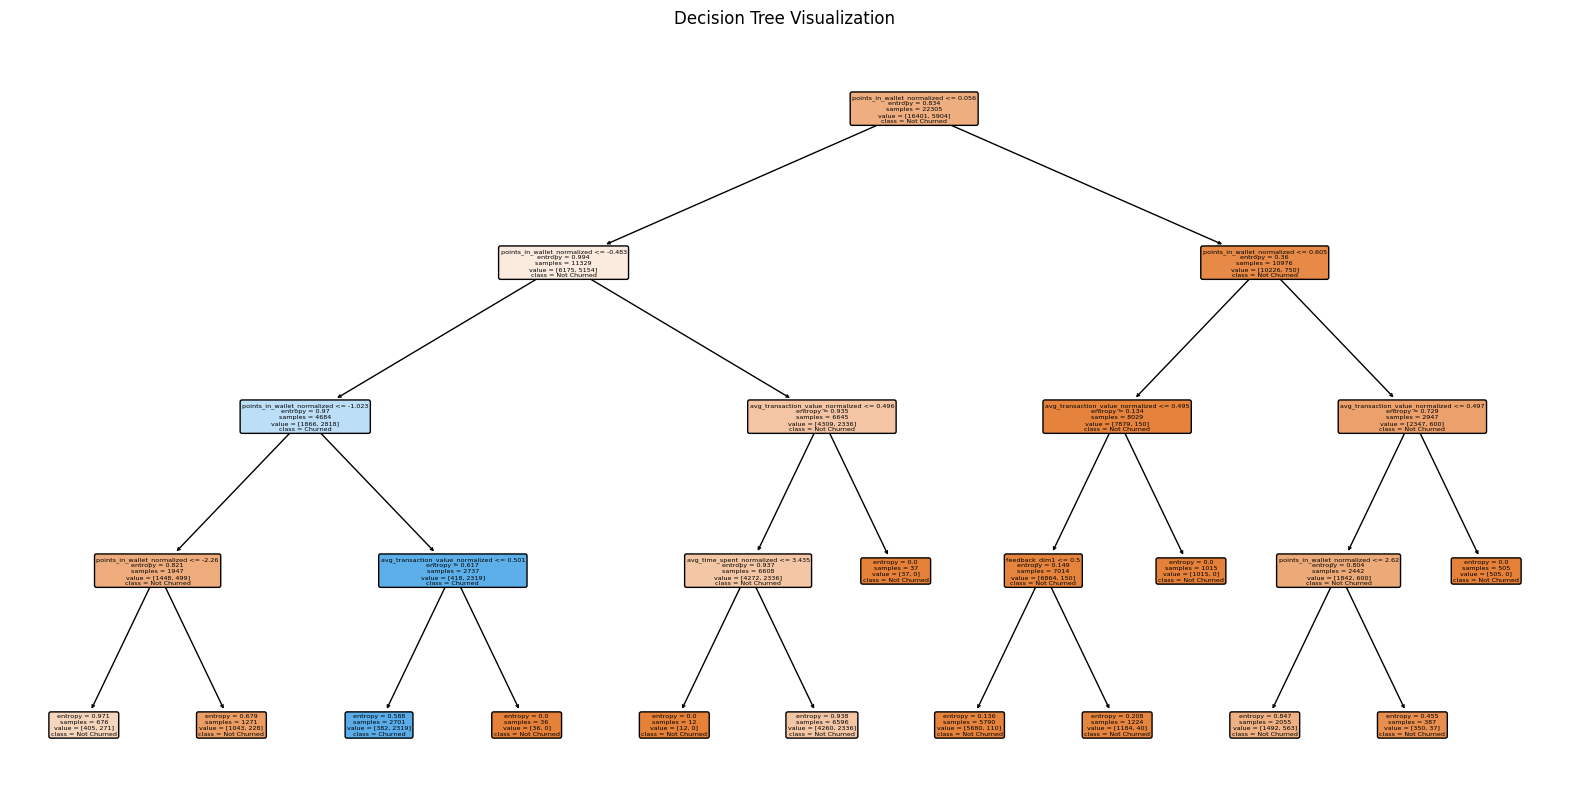

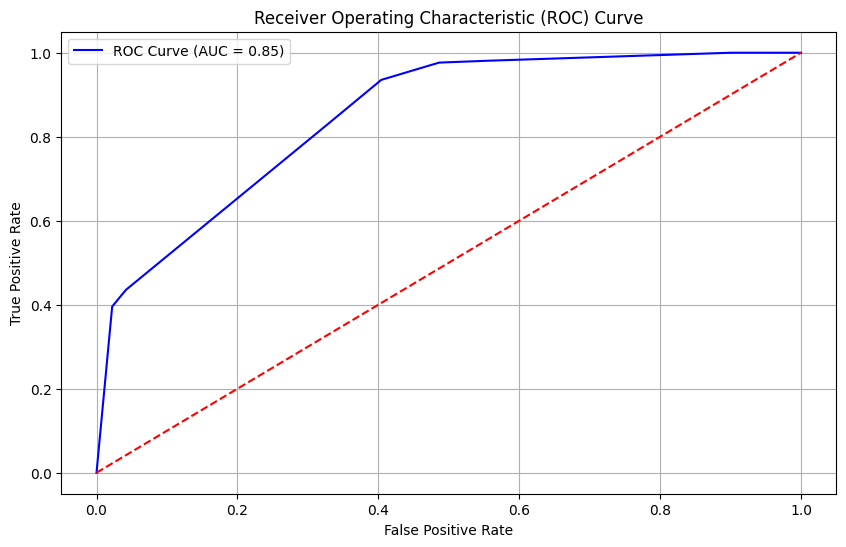

Confusion Matrix:
Predicted     0    1   All
Actual                    
0          1759   40  1799
1           411  269   680
All        2170  309  2479


In [17]:
DecisionTreeClassifierTrain(X_train, y_train, X_test, y_test)

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1799
           1       0.87      0.40      0.54       680

    accuracy                           0.82      2479
   macro avg       0.84      0.69      0.72      2479
weighted avg       0.83      0.82      0.79      2479



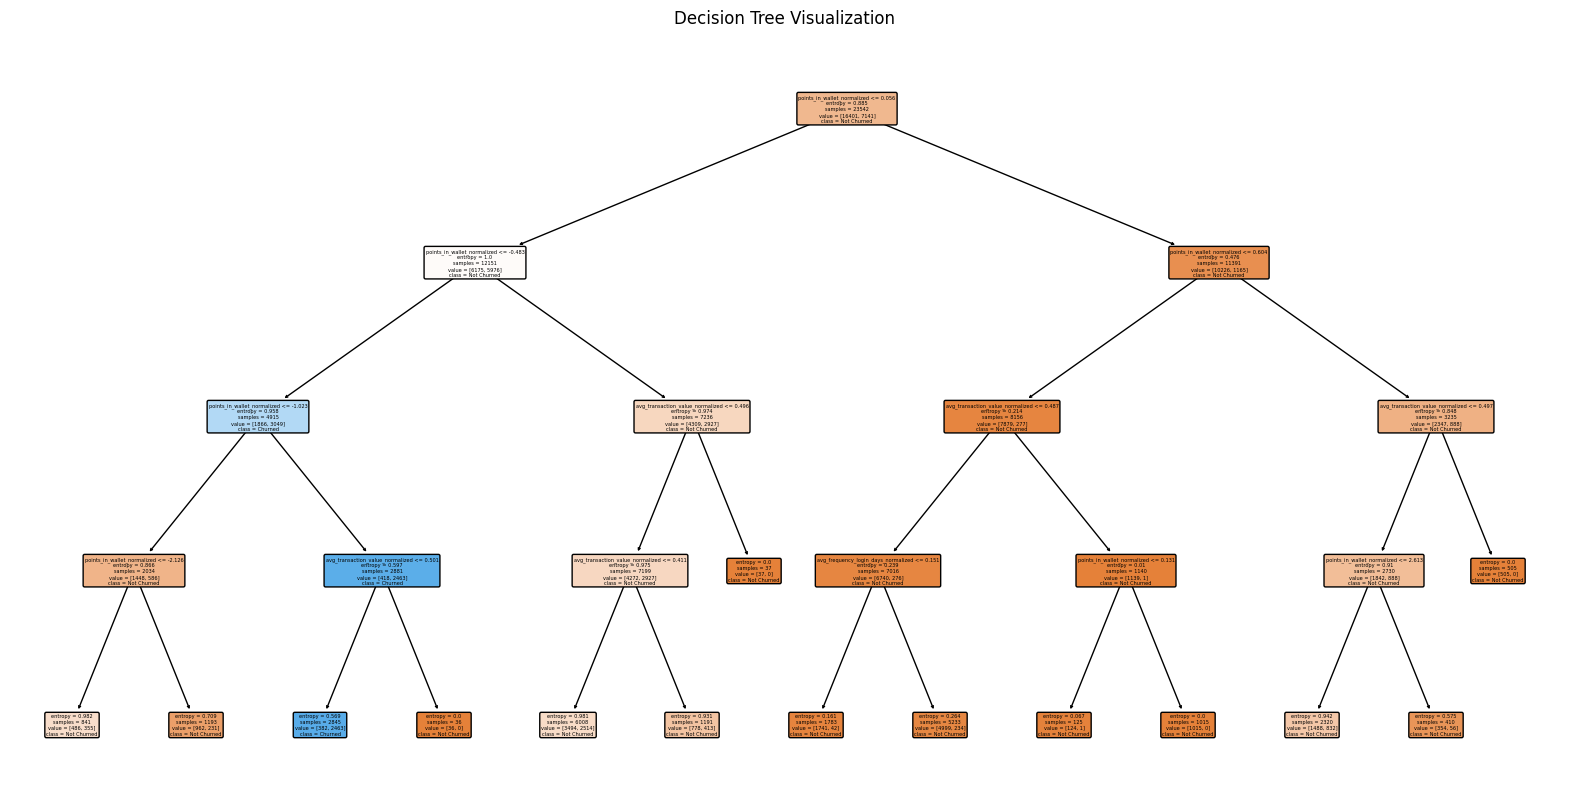

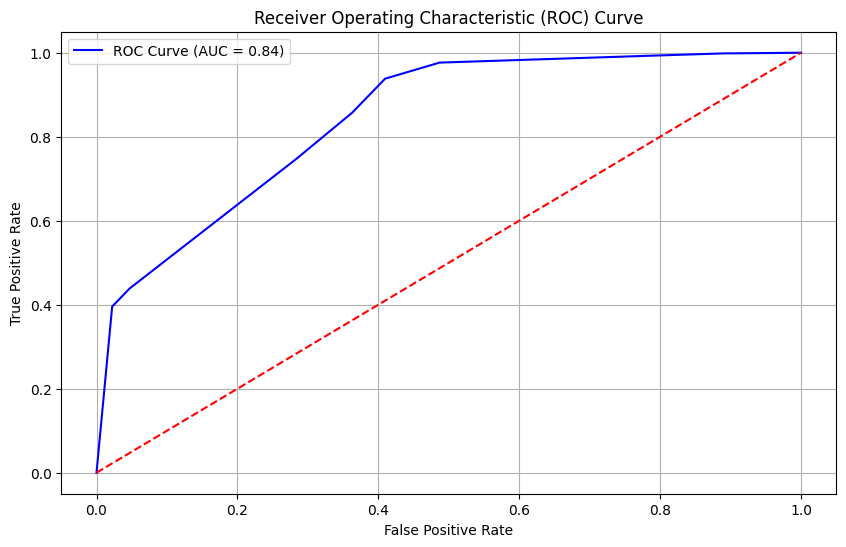

Confusion Matrix:
Predicted     0    1   All
Actual                    
0          1759   40  1799
1           411  269   680
All        2170  309  2479


In [18]:
DecisionTreeClassifierTrain(X_res, y_res, X_test, y_test)

### Decision Tree Classifier with GridSearchCV

In [19]:
# dt = DecisionTreeClassifier(random_state=42)

# # STEP 2: Define the hyperparameter grid
# param_grid = {
#     'max_depth': [3, 5, 7, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 3, 5],
#     'criterion': ['gini', 'entropy']  # or 'log_loss' if using sklearn >= 1.1
# }

# # STEP 3: Create the GridSearchCV object
# grid_search = GridSearchCV(
#     estimator=dt,
#     param_grid=param_grid,
#     cv=5,                   # 5-fold cross-validation
#     scoring='accuracy',     # or 'f1', 'roc_auc' for imbalanced data
#     n_jobs=-1,              # use all CPU cores
#     verbose=1
# )

# # STEP 4: Fit to training data
# grid_search.fit(X_train, y_train)

# # STEP 5: Print best params and evaluate
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation Score:", grid_search.best_score_)

# # Predict and evaluate on test set
# best_dt = grid_search.best_estimator_
# y_pred = best_dt.predict(X_test)
# print("Decision Tree (Tuned) Classification Report:")
# print(classification_report(y_test, y_pred))

## XGBoost Classifier with GridSearchCV 
* Second try

In [20]:
def XGBoostClassifierTrain(X_train, y_train, X_test, y_test):

    # STEP 3: (Optional but recommended) Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # STEP 4: Define the model and hyperparameter grid
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1],
        'colsample_bytree': [0.8, 1]
    }

    # STEP 5: Create and run GridSearchCV
    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        scoring='roc_auc',   # or 'accuracy', 'f1', etc.
        cv=5,
        verbose=1,
        n_jobs=-1
    )

    grid_search.fit(X_train_scaled, y_train)

    # STEP 6: Evaluate the best model
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation AUC:", grid_search.best_score_)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

    print("Test Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Test ROC-AUC:", roc_auc_score(y_test, y_proba))

    # print roc curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()
    # create confusion matrix
    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
    print("Confusion Matrix:")
    print(confusion_matrix)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/opt/anaconda3/envs/py310/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:14:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/py310/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:14:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/py310/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:14:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/py310/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:14:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are

Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validation AUC: 0.8549338912582144
Test Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.88      1799
           1       0.87      0.38      0.52       680

    accuracy                           0.81      2479
   macro avg       0.84      0.68      0.70      2479
weighted avg       0.82      0.81      0.78      2479

Test ROC-AUC: 0.8484296831573095


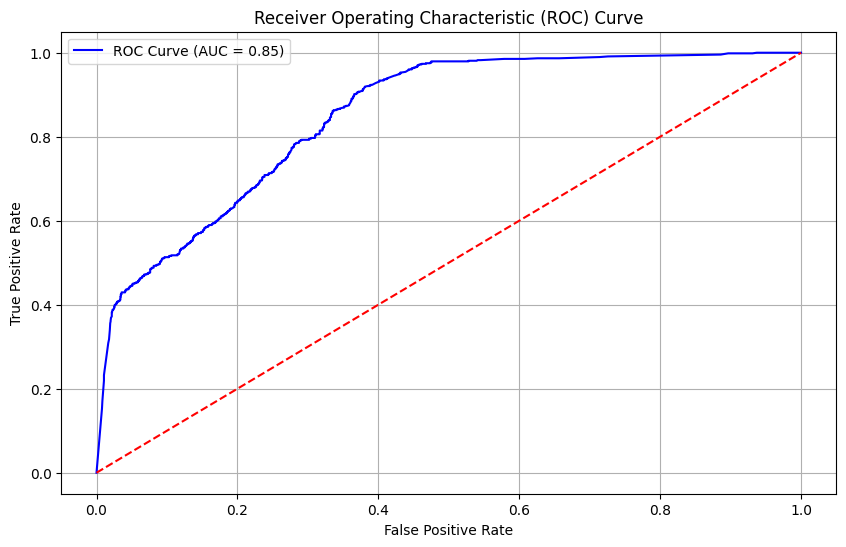

Confusion Matrix:
Predicted     0    1   All
Actual                    
0          1760   39  1799
1           425  255   680
All        2185  294  2479


In [21]:
XGBoostClassifierTrain(X_train, y_train, X_test, y_test)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


/opt/anaconda3/envs/py310/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:15:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/py310/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:15:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/py310/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:15:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/py310/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:15:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validation AUC: 0.8420405322639957
Test Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.88      1799
           1       0.86      0.39      0.53       680

    accuracy                           0.81      2479
   macro avg       0.83      0.68      0.71      2479
weighted avg       0.82      0.81      0.79      2479

Test ROC-AUC: 0.848042621717948


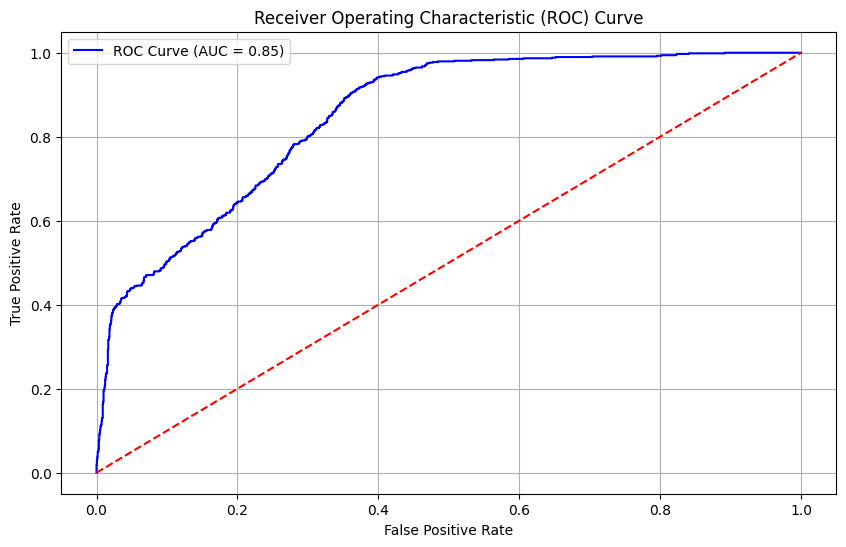

Confusion Matrix:
Predicted     0    1   All
Actual                    
0          1756   43  1799
1           416  264   680
All        2172  307  2479


In [22]:
XGBoostClassifierTrain(X_res, y_res, X_test, y_test)

## KNN Classifier
* Train the model and evaluate its performance using the `KNeighborsClassifier` from `sklearn.neighbors`.

In [23]:
# # STEP 3: Standardize the features (important for KNN)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # STEP 4: Create and train the KNN model
# knn_model = KNeighborsClassifier(n_neighbors=2)  # You can try different k values
# knn_model.fit(X_train_scaled, y_train)

# # STEP 5: Make predictions and evaluate
# y_pred = knn_model.predict(X_test_scaled)
# print("KNN Classification Report:")
# print(classification_report(y_test, y_pred))

In [24]:
# # create AUC curve for KNN
# y_prob = knn_model.predict_proba(X_test_scaled)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# roc_auc = roc_auc_score(y_test, y_prob)
# plt.figure(figsize=(10, 6))
# plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
# plt.plot([0, 1], [0, 1], color='red', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
# plt.legend(loc='lower right')
# plt.show()

In [25]:
#

## Neural Network Classifier
* Train the model and evaluate its performance using the `MLPClassifier` from `sklearn.neural_network`.


In [26]:
# # def NeuralNetworkClassifierTrain(X_train, y_train, X_test, y_test):
# #     # STEP 2: Normalize your features (important for neural nets)
    

# #     # STEP 3: Define and train the 3-layer Neural Network
# #     # Hidden layers: 12 → 16 → 16 neurons
# #     nn_model = MLPClassifier(
# #         hidden_layer_sizes=(16, 12, 8 , 6),
# #         activation='tanh',         # You can try 'tanh' or 'logistic' as well
# #         solver='adam',             # Optimizer
# #         max_iter=600,              # Increase if convergence warning
# #         random_state= RANDOM_STATE,
# #         learning_rate_init=0.001,  # Learning rate
        
# #     )

# #     nn_model.fit(X_train, y_train)

# #     # STEP 4: Predict and evaluate
# #     y_pred = nn_model.predict(X_test)
# #     print("Neural Network Classification Report:")
# #     print(classification_report(y_test, y_pred))
# #     # create an AUC curve for the neural network model
# #     y_prob = nn_model.predict_proba(X_test)[:, 1]
# #     fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# #     roc_auc = roc_auc_score(y_test, y_prob)
# #     plt.figure(figsize=(8, 6))
# #     plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
# #     plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
# #     plt.title('ROC Curve for Neural Network Model')
# #     plt.xlabel('False Positive Rate')
# #     plt.ylabel('True Positive Rate')
# #     plt.legend()
# #     plt.grid()
# #     plt.show()



# from sklearn.pipeline import Pipeline

# # from sklearn.neural_network import MLPClassifier
# # from sklearn.preprocessing import StandardScaler
# # from sklearn.model_selection import GridSearchCV
# # from sklearn.metrics import classification_report, roc_curve, roc_auc_score
# # import matplotlib.pyplot as plt

# def NeuralNetworkClassifierTrain(X_train, y_train, X_test, y_test):
#     # STEP 1: Set up a pipeline with scaling and classifier
#     pipe = Pipeline([
#         ('scaler', StandardScaler()),
#         ('mlp', MLPClassifier(max_iter=600, random_state=42))
#     ])

#     # STEP 2: Define hyperparameter grid to search
#     param_grid = {
#         'mlp__hidden_layer_sizes': [(16, 12, 8), (32, 16), (64, 32, 16)],
#         'mlp__activation': ['relu', 'tanh'],
#         'mlp__solver': ['adam', 'sgd'],
#         'mlp__learning_rate_init': [0.01, 0.001],
#     }

#     # STEP 3: Grid search for best model
#     grid = GridSearchCV(pipe, param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)
#     grid.fit(X_train, y_train)

#     print("Best parameters found:", grid.best_params_)

#     # STEP 4: Predict and evaluate
#     best_model = grid.best_estimator_
#     y_pred = best_model.predict(X_test)
#     y_prob = best_model.predict_proba(X_test)[:, 1]

#     print("Neural Network Classification Report:")
#     print(classification_report(y_test, y_pred))

#     # STEP 5: ROC Curve
#     fpr, tpr, _ = roc_curve(y_test, y_prob)
#     roc_auc = roc_auc_score(y_test, y_prob)

#     plt.figure(figsize=(8, 6))
#     plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
#     plt.plot([0, 1], [0, 1], color='red', linestyle='--')
#     plt.title('ROC Curve for Neural Network Model')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.legend()
#     plt.grid()
#     plt.show()


In [27]:
# NeuralNetworkClassifierTrain(X_train, y_train, X_test, y_test)


In [28]:

from torch.utils.data import TensorDataset, DataLoader

# -----------------------------
# Model Definition
# -----------------------------
L1_SIZE = 16
L2_SIZE =8

class PReLUNet(nn.Module):
    def __init__(self, input_dim):
        super(PReLUNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, L1_SIZE),
            nn.ReLU(),
            nn.Linear(L1_SIZE, L2_SIZE),
            nn.ReLU(),
            nn.Linear(L2_SIZE, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)


# -----------------------------
# Data Preparation
# -----------------------------
def preprocess_data(X_train, X_test, y_train, y_test):
    # scaler = StandardScaler()
    # X_train_scaled = scaler.fit_transform(X_train)
    # X_test_scaled = scaler.transform(X_test)
    # if the X_train is np don't change it , else convert it to numpy
    if isinstance(X_train, pd.DataFrame):
        X_train = X_train.to_numpy()
        X_test = X_test.to_numpy()
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.to_numpy().reshape(-1, 1), dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.to_numpy().reshape(-1, 1), dtype=torch.float32)

    return X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor


# -----------------------------
# Training
# -----------------------------
def train_model(model, train_loader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


# -----------------------------
# Evaluation
# -----------------------------
THRESHOLD = 0.196  # This is the threshold you found to be best in your previous runs
def evaluate_model(model, X_test_tensor, y_test):
    model.eval()
    with torch.no_grad():
        y_prob = np.array(model(X_test_tensor).detach().cpu().tolist()).flatten()
        y_pred = (y_prob >= THRESHOLD).astype(int)  # use best threshold

        # y_prob = np.array(model(X_test_tensor).detach().cpu().tolist()).flatten()

    # Step 1: ROC metrics
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Step 2: Find best threshold (Youden's J = tpr - fpr)
    j_scores = tpr - fpr
    best_idx = np.argmax(j_scores)
    best_threshold = thresholds[best_idx]

    print(f"✅ Best Threshold (Youden’s J): {best_threshold:.4f}")
    print(f"AUC Score: {roc_auc:.4f}")

    # Step 3: Predict using the best threshold
    y_pred = (y_prob >= best_threshold).astype(int)

    print("\nNeural Network Classification Report (Using Best Threshold):")
    print(classification_report(y_test, y_pred))

    # Step 4: Plot ROC
    plot_roc_curve(fpr, tpr, roc_auc)

    return best_threshold  # so you can use it later


# -----------------------------
# Plotting
# -----------------------------
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid()
    plt.show()


# -----------------------------
# Main Training Pipeline
# -----------------------------
def NeuralNetworkClassifierTrain(X_train, y_train, X_test, y_test, epochs=100, batch_size=32, lr=0.001):
    X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = preprocess_data(
        X_train, X_test, y_train, y_test
    )

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    model = PReLUNet(input_dim=X_train.shape[1])
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_model(model, train_loader, criterion, optimizer, epochs)
    evaluate_model(model, X_test_tensor, y_test)
    return model, X_test_tensor, y_test


In [ ]:
# model, X_test_tensor, y_test = NeuralNetworkClassifierTrain(X_train, y_train, X_test, y_test, epochs=100, batch_size=600, lr=0.001)
model, X_test_tensor, y_test = NeuralNetworkClassifierTrain(X_train, y_train, X_test, y_test, epochs=160, batch_size=2000, lr=0.001)

: 

Epoch 10/150, Loss: 0.6352
Epoch 20/150, Loss: 0.6270
Epoch 30/150, Loss: 0.6312
Epoch 40/150, Loss: 0.6315
Epoch 50/150, Loss: 0.6178
Epoch 60/150, Loss: 0.6266
Epoch 70/150, Loss: 0.6206
Epoch 80/150, Loss: 0.6132
Epoch 90/150, Loss: 0.6128
Epoch 100/150, Loss: 0.6170
Epoch 110/150, Loss: 0.6340
Epoch 120/150, Loss: 0.6287
Epoch 130/150, Loss: 0.6365
Epoch 140/150, Loss: 0.6206
Epoch 150/150, Loss: 0.6156
✅ Best Threshold (Youden’s J): inf
AUC Score: 0.5000

Neural Network Classification Report (Using Best Threshold):
              precision    recall  f1-score   support

           0       0.72      1.00      0.84      3253
           1       0.00      0.00      0.00      1234

    accuracy                           0.72      4487
   macro avg       0.36      0.50      0.42      4487
weighted avg       0.53      0.72      0.61      4487



/Users/shakedchen/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/shakedchen/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/shakedchen/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

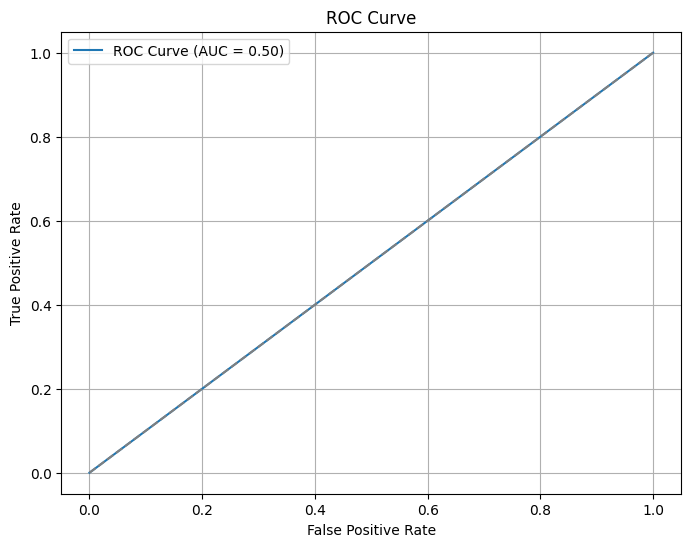

(PReLUNet(
   (net): Sequential(
     (0): Linear(in_features=13, out_features=16, bias=True)
     (1): ReLU()
     (2): Linear(in_features=16, out_features=8, bias=True)
     (3): ReLU()
     (4): Linear(in_features=8, out_features=1, bias=True)
     (5): Sigmoid()
   )
 ),
 tensor([[ 1.0000,  1.0000,  1.0000,  ...,  0.2683,  1.0000,  0.0000],
         [ 1.0000,  1.0000,  1.0000,  ...,  0.4175,  0.0000, -1.0000],
         [ 1.0000,  1.0000,  1.0000,  ...,  0.3280,  1.0000,  0.0000],
         ...,
         [ 0.0000,  1.0000,  1.0000,  ...,  0.4175,  1.0000, -1.0000],
         [ 1.0000,  1.0000,  1.0000,  ...,  0.1341,  1.0000, -1.0000],
         [ 0.0000,  1.0000,  1.0000,  ...,  0.3727,  0.0000, -1.0000]]),
 6769     0
 8171     1
 6603     0
 5305     0
 16031    0
         ..
 7722     1
 16782    0
 6498     1
 13205    0
 20475    0
 Name: churn, Length: 4487, dtype: int64)

: 

In [ ]:
# NeuralNetworkClassifierTrain(X_res, y_res, X_test, y_test, epochs=100, batch_size=1000, lr=0.001)
NeuralNetworkClassifierTrain(X_res, y_res, X_test, y_test, epochs=150, batch_size=2500, lr=0.01)

Epoch 10/200, Loss: 0.4510
Epoch 20/200, Loss: 0.4277
Epoch 30/200, Loss: 0.4329
Epoch 40/200, Loss: 0.3513
Epoch 50/200, Loss: 0.4058
Epoch 60/200, Loss: 0.3892
Epoch 70/200, Loss: 0.3508
Epoch 80/200, Loss: 0.3736
Epoch 90/200, Loss: 0.3672
Epoch 100/200, Loss: 0.3836
Epoch 110/200, Loss: 0.3538
Epoch 120/200, Loss: 0.3508
Epoch 130/200, Loss: 0.3673
Epoch 140/200, Loss: 0.3602
Epoch 150/200, Loss: 0.4162
Epoch 160/200, Loss: 0.3706
Epoch 170/200, Loss: 0.3974
Epoch 180/200, Loss: 0.4451
Epoch 190/200, Loss: 0.3910
Epoch 200/200, Loss: 0.3401
✅ Best Threshold (Youden’s J): 0.1417
AUC Score: 0.8539

Neural Network Classification Report (Using Best Threshold):
              precision    recall  f1-score   support

           0       0.96      0.59      0.73      3253
           1       0.46      0.94      0.62      1234

    accuracy                           0.69      4487
   macro avg       0.71      0.77      0.68      4487
weighted avg       0.83      0.69      0.70      4487



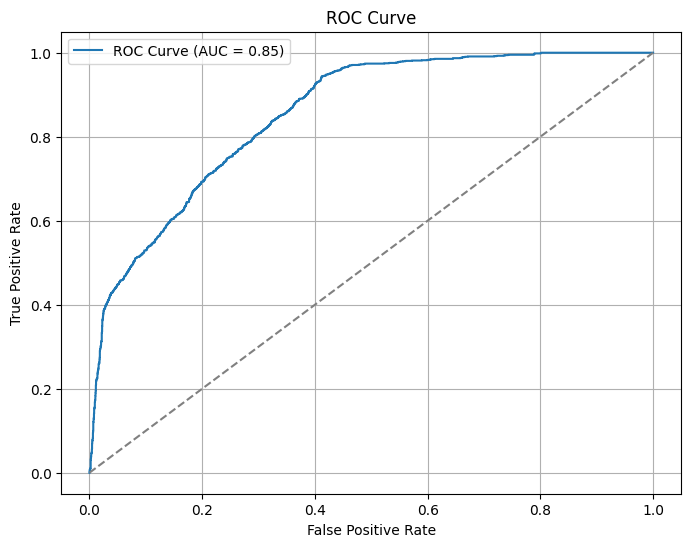

(PReLUNet(
   (net): Sequential(
     (0): Linear(in_features=13, out_features=16, bias=True)
     (1): ReLU()
     (2): Linear(in_features=16, out_features=8, bias=True)
     (3): ReLU()
     (4): Linear(in_features=8, out_features=1, bias=True)
     (5): Sigmoid()
   )
 ),
 tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.1538,  1.0000,  1.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.9231,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.4615,  1.0000,  1.0000],
         ...,
         [-1.0000,  0.0000,  0.0000,  ...,  0.9231,  1.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ..., -0.5385,  1.0000,  0.0000],
         [-1.0000,  0.0000,  0.0000,  ...,  0.6923,  0.0000,  0.0000]]),
 6769     0
 8171     1
 6603     0
 5305     0
 16031    0
         ..
 7722     1
 16782    0
 6498     1
 13205    0
 20475    0
 Name: churn, Length: 4487, dtype: int64)

: 

In [ ]:
NeuralNetworkClassifierTrain(X_train_scaled, y_train, X_test_scaled, y_test, epochs=200, batch_size=300, lr=0.001)

Epoch 10/100, Loss: 0.4032
Epoch 20/100, Loss: 0.4409
Epoch 30/100, Loss: 0.4942
Epoch 40/100, Loss: 0.5009
Epoch 50/100, Loss: 0.3815
Epoch 60/100, Loss: 0.3821
Epoch 70/100, Loss: 0.4189
Epoch 80/100, Loss: 0.4025
Epoch 90/100, Loss: 0.5682
Epoch 100/100, Loss: 0.4280
✅ Best Threshold (Youden’s J): 0.2237
AUC Score: 0.8418

Neural Network Classification Report (Using Best Threshold):
              precision    recall  f1-score   support

           0       0.97      0.58      0.73      3253
           1       0.46      0.95      0.62      1234

    accuracy                           0.68      4487
   macro avg       0.71      0.76      0.67      4487
weighted avg       0.83      0.68      0.70      4487



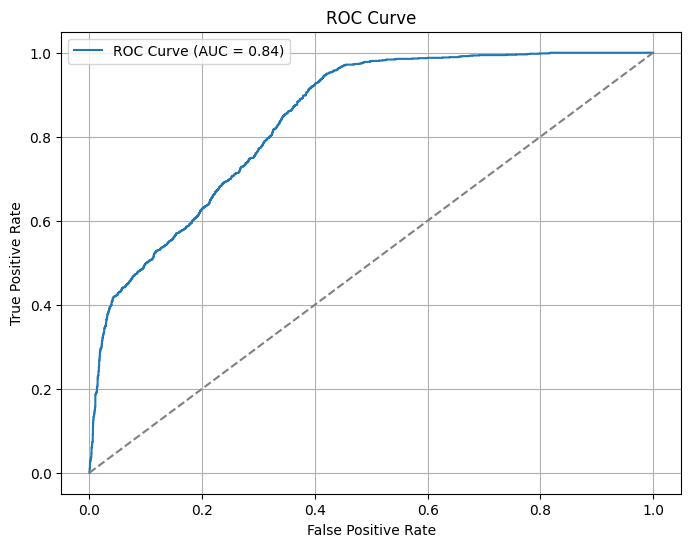

: 

In [ ]:
model, X_test_tensor, y_test = NeuralNetworkClassifierTrain(X_res, y_res, X_test, y_test, epochs=100, batch_size=64, lr=0.001)

In [ ]:
import torch
import json

# Save model weights
torch.save(model.state_dict(), "prelu_model.pth")

# Save threshold separately
with open("models/prelu_model_config.json", "w") as f:
    json.dump({"best_threshold": float(THRESHOLD)}, f)


: 

Epoch 10/200, Loss: 0.5302
Epoch 20/200, Loss: 0.4568
Epoch 30/200, Loss: 0.4633
Epoch 40/200, Loss: 0.4225
Epoch 50/200, Loss: 0.4225
Epoch 60/200, Loss: 0.5038
Epoch 70/200, Loss: 0.4471
Epoch 80/200, Loss: 0.4137
Epoch 90/200, Loss: 0.4797
Epoch 100/200, Loss: 0.4357
Epoch 110/200, Loss: 0.5106
Epoch 120/200, Loss: 0.5506
Epoch 130/200, Loss: 0.3712
Epoch 140/200, Loss: 0.4548
Epoch 150/200, Loss: 0.4498
Epoch 160/200, Loss: 0.4367
Epoch 170/200, Loss: 0.4776
Epoch 180/200, Loss: 0.4449
Epoch 190/200, Loss: 0.4937
Epoch 200/200, Loss: 0.3875
✅ Best Threshold (Youden’s J): 0.2190
AUC Score: 0.8482

Neural Network Classification Report (Using Best Threshold):
              precision    recall  f1-score   support

           0       0.97      0.57      0.72      3253
           1       0.46      0.96      0.62      1234

    accuracy                           0.68      4487
   macro avg       0.72      0.77      0.67      4487
weighted avg       0.83      0.68      0.69      4487



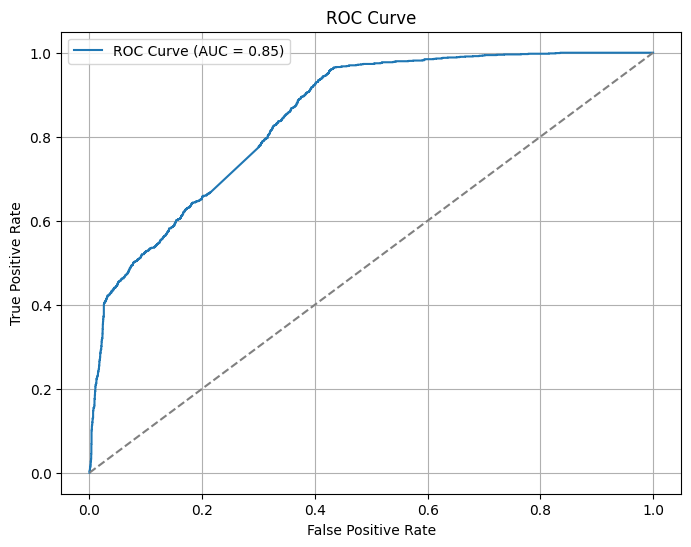

(PReLUNet(
   (net): Sequential(
     (0): Linear(in_features=13, out_features=16, bias=True)
     (1): ReLU()
     (2): Linear(in_features=16, out_features=8, bias=True)
     (3): ReLU()
     (4): Linear(in_features=8, out_features=1, bias=True)
     (5): Sigmoid()
   )
 ),
 tensor([[ 1.0000,  1.0000,  1.0000,  ...,  0.2683,  1.0000,  0.0000],
         [ 1.0000,  1.0000,  1.0000,  ...,  0.4175,  0.0000, -1.0000],
         [ 1.0000,  1.0000,  1.0000,  ...,  0.3280,  1.0000,  0.0000],
         ...,
         [ 0.0000,  1.0000,  1.0000,  ...,  0.4175,  1.0000, -1.0000],
         [ 1.0000,  1.0000,  1.0000,  ...,  0.1341,  1.0000, -1.0000],
         [ 0.0000,  1.0000,  1.0000,  ...,  0.3727,  0.0000, -1.0000]]),
 6769     0
 8171     1
 6603     0
 5305     0
 16031    0
         ..
 7722     1
 16782    0
 6498     1
 13205    0
 20475    0
 Name: churn, Length: 4487, dtype: int64)

: 

In [ ]:
NeuralNetworkClassifierTrain(X_res, y_res, X_test, y_test, epochs=200, batch_size=256, lr=0.001)

## Logistic Regression Classifier
* Train the model and evaluate its performance using the `LogisticRegression` from `sklearn.linear_model`.

In [ ]:
# # STEP 3: Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # STEP 4: Train Logistic Regression
# logreg = LogisticRegression(max_iter=300, class_weight='balanced', random_state=42)
# logreg.fit(X_train_scaled, y_train)

# # STEP 5: Predict and evaluate
# y_pred = logreg.predict(X_test_scaled)
# y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# print("Logistic Regression Classification Report:")
# print(classification_report(y_test, y_pred))

: 

In [ ]:
# # STEP 6: ROC Curve and AUC
# fpr, tpr, thresholds = roc_curve(y_test, y_proba)
# auc_score = roc_auc_score(y_test, y_proba)

# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, label=f"LogReg (AUC = {auc_score:.2f})", linewidth=2)
# plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier", alpha=0.6)
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve - Logistic Regression (Churn)")
# plt.legend()
# plt.grid(True)
# plt.show()

: 

In [ ]:
# len(y_res == 0)

: 

: 

## XGBoost Classifier
* Train the model and evaluate its performance using the `XGBClassifier` from `xgboost`.

: 

In [ ]:


# # (Optional) STEP 3: Standardize features (not strictly necessary for XGBoost, but good if others do)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # STEP 4: Train the XGBoost model
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE)
# xgb_model.fit(X_train_scaled, y_train)

# # STEP 5: Evaluate the model
# y_pred = xgb_model.predict(X_test_scaled)
# y_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# print("XGBoost Classification Report:")
# print(classification_report(y_test, y_pred))

: 

In [ ]:
# # STEP 6: ROC Curve and AUC
# fpr, tpr, thresholds = roc_curve(y_test, y_proba)
# auc_score = roc_auc_score(y_test, y_proba)

# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, label=f"XGBoost (AUC = {auc_score:.2f})", linewidth=2)
# plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier", alpha=0.6)
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve for XGBoost - Churn Prediction")
# plt.legend()
# plt.grid(True)
# plt.show()

: 

: 

: 

## GradientBoostingClassifier
* Train the model and evaluate its performance using the `GradientBoostingClassifier` from `sklearn.ensemble`.

In [ ]:
def GradientBoostingClassifierTrain(X_train, y_train, X_test, y_test):
    # STEP 3: Optional - Scale features (GBDT doesn't strictly require it, but still good if features vary widely)
    scaler = StandardScaler()


    # STEP 4: Train Gradient Boosting Classifier
    gbdt_model = GradientBoostingClassifier(
        n_estimators=100,        # number of boosting stages (trees)
        learning_rate=0.1,       # shrinkage rate
        max_depth=3,             # tree depth
        random_state=42
    )
    gbdt_model.fit(X_train, y_train)

    # STEP 5: Predict and evaluate
    y_pred = gbdt_model.predict(X_test)
    y_proba = gbdt_model.predict_proba(X_test)[:, 1]

    print("Gradient Boosting Classification Report:")
    print(classification_report(y_test, y_pred))

    # STEP 6: ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"GBDT (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - Gradient Boosting (Churn Prediction)")
    plt.legend()
    plt.grid(True)
    plt.show()

: 

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      3253
           1       0.85      0.42      0.57      1234

    accuracy                           0.82      4487
   macro avg       0.84      0.70      0.73      4487
weighted avg       0.83      0.82      0.80      4487



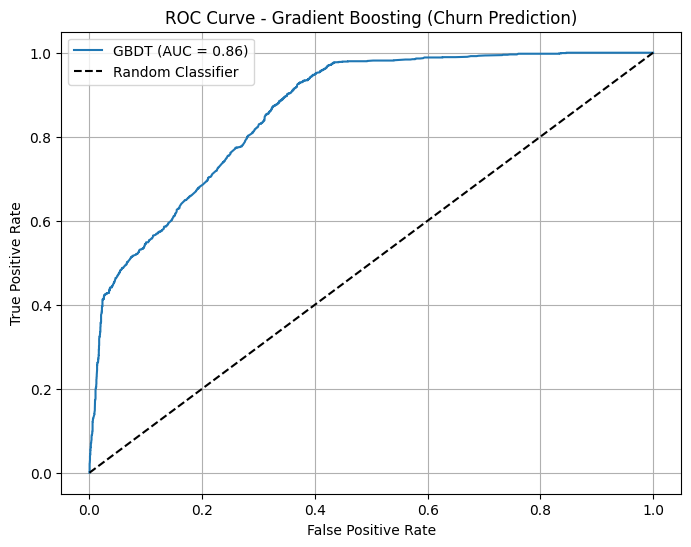

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      3253
           1       0.82      0.45      0.58      1234

    accuracy                           0.82      4487
   macro avg       0.82      0.71      0.73      4487
weighted avg       0.82      0.82      0.80      4487



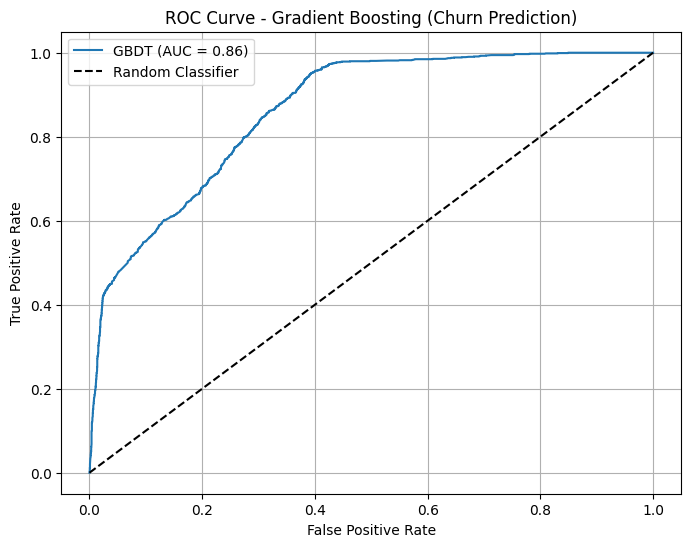

: 

In [ ]:
GradientBoostingClassifierTrain(X_train, y_train, X_test, y_test)
GradientBoostingClassifierTrain(X_res, y_res, X_test, y_test)

: 

In [ ]:
def RandomForestClassifierTrain(X_train, y_train, X_test, y_test):

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    # create AUC curve for Random Forest
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

    rf_model = RandomForestClassifier(
        n_estimators=100,         # number of trees
        max_depth=None,           # trees grow until pure or min_samples_split
        random_state=42,
        class_weight='balanced'   # helpful for class imbalance
    )
    rf_model.fit(X_train, y_train)

    # STEP 5: Predict and evaluate
    y_pred = rf_model.predict(X_test)
    y_proba = rf_model.predict_proba(X_test)[:, 1]

    print("Random Forest Classification Report:")
    print(classification_report(y_test, y_pred))

    # STEP 6: ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - Random Forest (Churn Prediction)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # create a matrix of confusion
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix - Random Forest")
    plt.show()

: 

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      3253
           1       0.64      0.54      0.58      1234

    accuracy                           0.79      4487
   macro avg       0.74      0.71      0.72      4487
weighted avg       0.78      0.79      0.78      4487



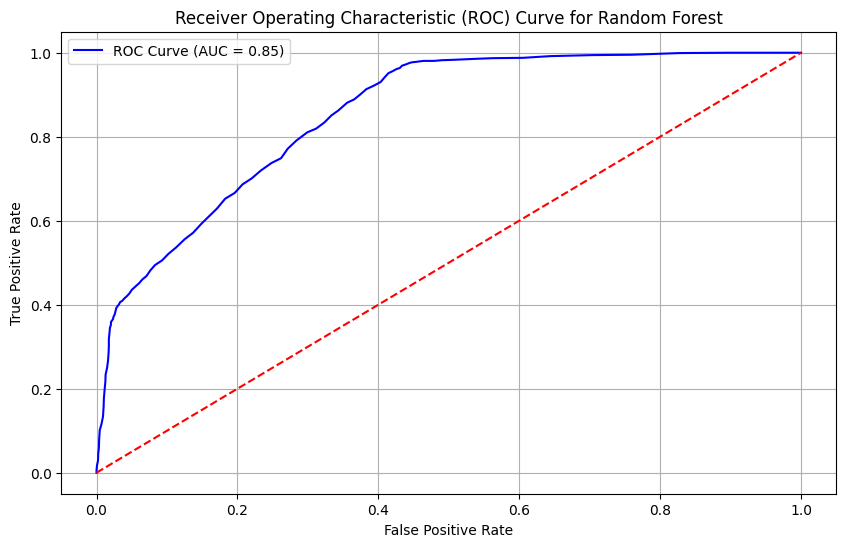

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      3253
           1       0.65      0.51      0.58      1234

    accuracy                           0.79      4487
   macro avg       0.74      0.71      0.72      4487
weighted avg       0.78      0.79      0.78      4487



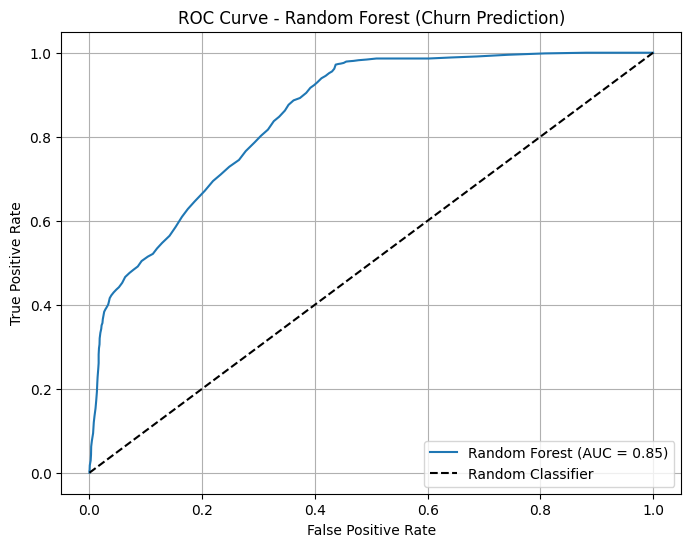

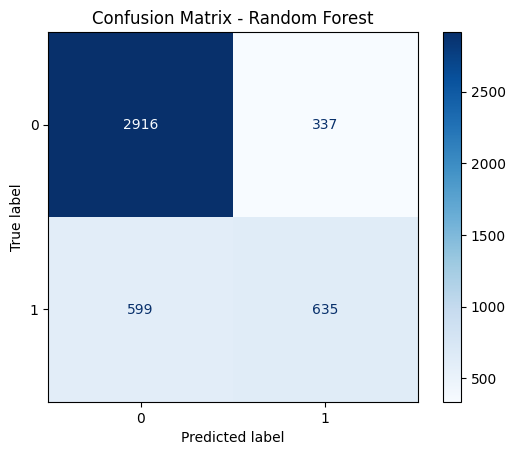

: 

In [ ]:
RandomForestClassifierTrain(X_res, y_res, X_test, y_test)


              precision    recall  f1-score   support

           0       0.82      0.94      0.88      3253
           1       0.74      0.45      0.56      1234

    accuracy                           0.81      4487
   macro avg       0.78      0.70      0.72      4487
weighted avg       0.80      0.81      0.79      4487



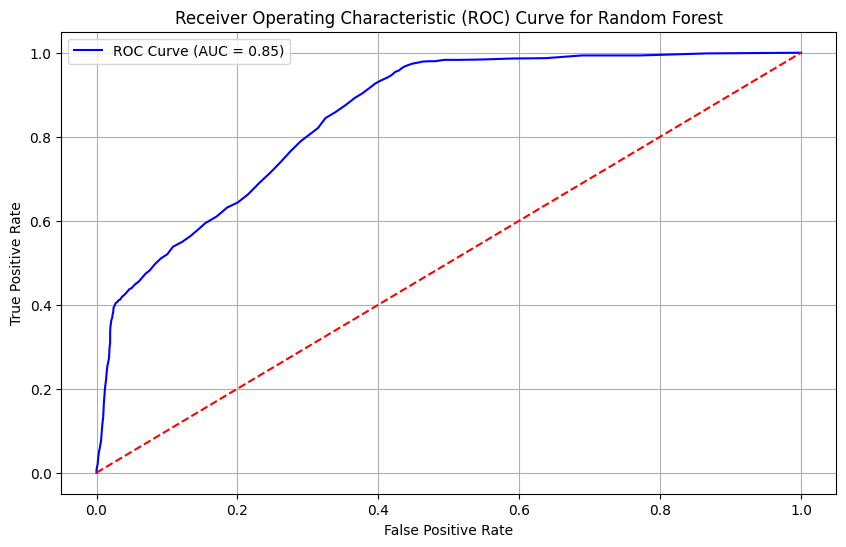

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      3253
           1       0.76      0.45      0.56      1234

    accuracy                           0.81      4487
   macro avg       0.79      0.70      0.72      4487
weighted avg       0.80      0.81      0.79      4487



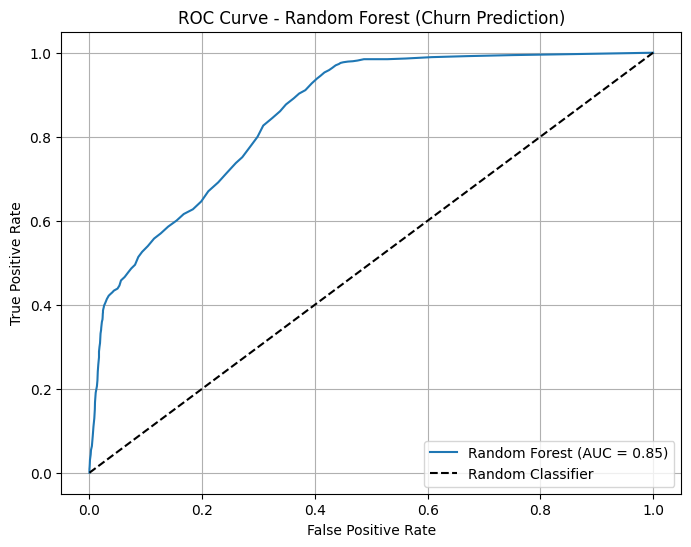

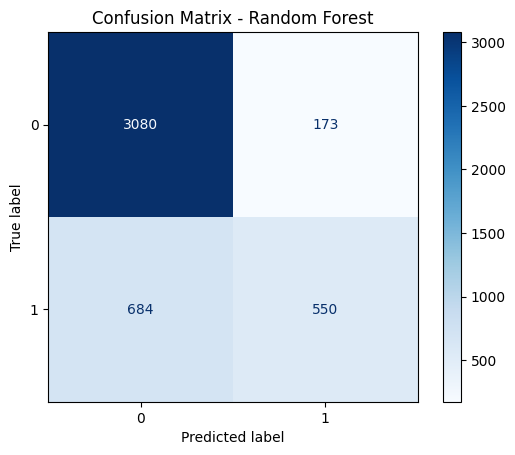

: 

In [ ]:
RandomForestClassifierTrain(X_train, y_train, X_test, y_test)


In [ ]:
# feature_importance = pd.Series(rf_model.feature_importances_, index=X_encoded.columns)
# top_features = feature_importance.sort_values(ascending=False).head(10)

# print("Top 10 Features Driving Churn:")
# print(top_features)

: 

: 

## Voting Classifier

: 

In [ ]:
def VotingClassifierTrain(X_train, y_train, X_test, y_test):
    # Define base models
    model1 = LogisticRegression(max_iter=300)
    model2 = RandomForestClassifier(n_estimators=100)
    model3 = SVC(probability=True)  # Required for soft voting

    # Combine into a voting ensemble
    voting_clf = VotingClassifier(
        estimators=[('lr', model1), ('rf', model2), ('svc', model3)],
        voting='soft'  # use predicted probabilities (more accurate than hard voting)
    )

    # Fit and evaluate
    voting_clf.fit(X_train, y_train)
    y_pred = voting_clf.predict(X_test)

    print("Voting Classifier Report:")
    print(classification_report(y_test, y_pred))

: 

In [ ]:
def VotingClassifierTrainAdvanced(X_train, y_train, X_test, y_test, nn_model=None, dt_model=None, xgb_model=None):
    # Combine them using VotingClassifier
    voting_clf = VotingClassifier(
        estimators=[
            ('nn', nn_model),
            ('dt', dt_model),
            ('xgb', xgb_model)
        ],
        voting='soft'  # soft = uses predicted probabilities; hard = uses predicted class labels
    )

    # Fit the ensemble
    voting_clf.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = voting_clf.predict(X_test)

    print("Voting Classifier Report (Neural Net + Decision Tree + XGBoost):")
    print(classification_report(y_test, y_pred))

: 

In [ ]:
# VotingClassifierTrainAdvanced(X_train, y_train, X_test, y_test, nn_model=mlp_model, dt_model=dt_model, xgb_model=xgb_model)

: 

: 

: 

: 

## GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("GaussianNB Report:")
print(classification_report(y_test, y_pred))


GaussianNB Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.83      3253
           1       0.52      0.37      0.43      1234

    accuracy                           0.73      4487
   macro avg       0.65      0.62      0.63      4487
weighted avg       0.71      0.73      0.72      4487



: 

In [ ]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("BernoulliNB Report:")
print(classification_report(y_test, y_pred))


BernoulliNB Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      3253
           1       0.48      0.44      0.46      1234

    accuracy                           0.71      4487
   macro avg       0.64      0.63      0.63      4487
weighted avg       0.71      0.71      0.71      4487



: 

: 

: 

: 

: 

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.98      0.84      3253
           1       0.60      0.09      0.16      1234

    accuracy                           0.73      4487
   macro avg       0.67      0.54      0.50      4487
weighted avg       0.70      0.73      0.66      4487



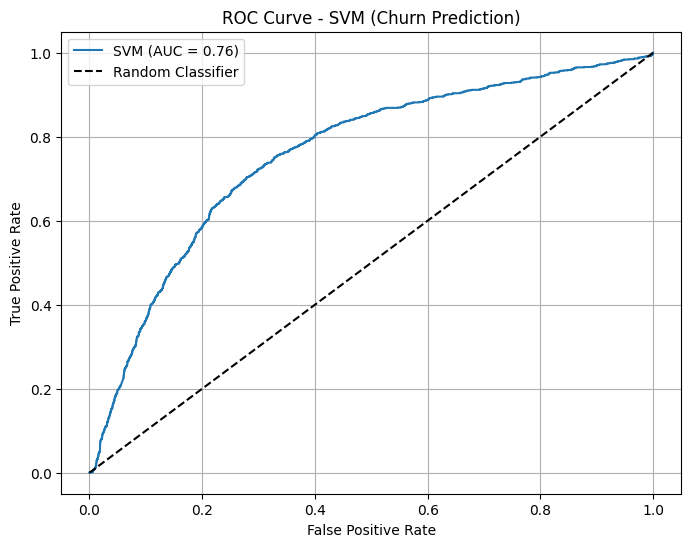

: 

In [ ]:
# STEP 3: Scale features (SVM is sensitive to feature scale!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 4: Train SVM model (with probability=True to allow ROC/AUC)
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# STEP 5: Predict and evaluate
y_pred = svm_model.predict(X_test_scaled)
y_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

print("SVM Classification Report:")
print(classification_report(y_test, y_pred))

# STEP 6: Plot ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"SVM (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM (Churn Prediction)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 

: 

: 

: 

: 

In [ ]:
# # please create the ROC curve for the XGBoost , NN and DecisionTreeClassifier model so 3 lines in the same graph
# # create AUC curve for Decision Tree
# y_pred_proba = dt_model.predict_proba(X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# roc_auc = roc_auc_score(y_test, y_pred_proba)
# # create AUC curve for Neural Network
# y_prob_nn = nn_model.predict_proba(X_test_scaled)[:, 1]
# fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_prob_nn)
# roc_auc_nn = roc_auc_score(y_test, y_prob_nn)
# # create AUC curve for XGBoost
# y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
# fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
# roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
# plt.figure(figsize=(10, 6))
# plt.plot(fpr, tpr, color='blue', label=f'Decision Tree ROC Curve (AUC = {roc_auc:.2f})')
# plt.plot(fpr_nn, tpr_nn, color='green', label=f'Neural Network ROC Curve (AUC = {roc_auc_nn:.2f})')
# plt.plot(fpr_xgb, tpr_xgb, color='orange', label=f'XGBoost ROC Curve (AUC = {roc_auc_xgb:.2f})')
# plt.plot([0, 1], [0, 1], color='red', linestyle='--')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend()
# plt.grid()
# plt.show()

: 

: 

: 

Decision Trees

Random Forest

XGBoost

Naive Bayes
Then you don’t need to scale — those models are scale-invariant.

: 

: 

: 

: 

: 

: 